## Basic Workflow

This notebook documents a basic Optima TB workflow with parameters and with programs. This file is best read in conjunction with the Optima TB wiki. In particular, it assumes familiarity with some of the key concepts in Optima TB described at https://github.com/thekerrlab/OptimaTB/wiki/Context

In [1]:
# IMPORTS
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
sys.path.append('..')
from optima_tb.project import Project
from optima_tb.utils import odict
from optima_tb.plotting import plotResult
from optima_tb.defaults import defaultOptimOptions
import optima_tb.plotting as oplt
import optima_tb.plotting2 as oplt2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
from optima_tb.plotting2 import plotSeries, PlotData



Optima TB: a TB optimization and analysis tool
Copyright (C) 2017 by the Optima Consortium



First, we will specify the location of the cascade file and databook file we wish to operate on:

In [2]:
cascade = '../../tb-ucl-analyses/south_africa/Cascadespreadsheets/cascade_south_africa_art.xlsx'
databook = '../../tb-ucl-analyses/south_africa/Databookspreadsheets/databook_south_africa.xlsx'

Next, we instantiate a `Project` object, specifying the cascade we want to use

In [3]:
proj = Project(name = 'south_africa', cascade_path = cascade, plotting_level = 'dev', validation_level = 'avert')

29-03-18 06:11:27    INFO     Loading settings
29-03-18 06:11:27    INFO     Validation settings: avert
29-03-18 06:11:27    INFO     Loading plotting settings: dev
29-03-18 06:11:28    INFO     The cascade was validated successfully!
29-03-18 06:11:28    INFO     Created settings based on cascade: ../../tb-ucl-analyses/south_africa/Cascadespreadsheets/cascade_south_africa_art.xlsx
29-03-18 06:11:28    INFO     Created project: south_africa


After creating the `Project`, we need to load in the databook. Note that the databook is matched to the cascade, in that the quantities entered into the databook must correspond to the properties defined in the cascade. If you don't already have a databook, you can make one using the Project object:

In [4]:
proj.makeSpreadsheet(databook_path='test.xlsx', num_pops = 5, num_progs = 2)

29-03-18 06:11:28    INFO     Attempting to create databook test.xlsx


Note that the number of populations and programs is fixed at the time the databook is created. It's difficult to change these afterwards because a lot of cells are automatically filled with formulas referring to other cells. 

After filling out the databook, you can then load in it using `loadSpreadsheet`:

In [5]:
proj.loadSpreadsheet(databook_path = databook)

29-03-18 06:11:28    INFO     Attempting to load databook ../../tb-ucl-analyses/south_africa/Databookspreadsheets/databook_south_africa.xlsx
29-03-18 06:11:29    WARNING  Please verify databook under Parameter: spd_infxness and population 0-4 as a number greater than 1 or negative number was entered for definition type "fraction" for Year: 2000, value entered: 11.0
29-03-18 06:11:29    WARNING  Please verify databook under Parameter: spd_infxness and population 15-64 as a number greater than 1 or negative number was entered for definition type "fraction" for Year: 2000, value entered: 6.5
29-03-18 06:11:29    WARNING  Please verify databook under Parameter: spd_infxness and population 15-64 (HIV+) as a number greater than 1 or negative number was entered for definition type "fraction" for Year: 2000, value entered: 3.4
29-03-18 06:11:29    WARNING  Please verify databook under Parameter: spd_infxness and population Prisoners as a number greater than 1 or negative number was entered for

Loading the spreadsheet into the project will populate the `data` property

In [6]:
proj.data.keys()

['meta', 'pops', 'contacts', 'transfers', 'progs', 'characs', 'linkpars']

However, no parameter sets have been created yet. The next step to run a simulation is to make a parset

In [7]:
proj.makeParset(name='default');

29-03-18 06:11:29    INFO     Created ParameterSet: default


You can use the label of the parset to identify it later on. If a parset with that name already exists, it will be overwritten.

Now that we have a parset, we can run a simulation. To run a basic simulation, all we need to specify is the name of the parset: 

In [8]:
par_results = proj.runSim(parset_name='default')

29-03-18 06:11:29    INFO     Initiating a standard run of project "south_africa" (i.e. without the influence of programs).
29-03-18 06:11:34    INFO     Elapsed time for running south_africa model: 4.749 s


A `ResultSet` object is returned from the `runSim` function. In addition, that object is saved in the Project:

In [9]:
proj.results.keys()

['parset_default_1']

That way, you can retrieve previous results from the Project if you didn't retain them when the simulation was run. 

We can now plot the result. See the Plotting documentation for full details:

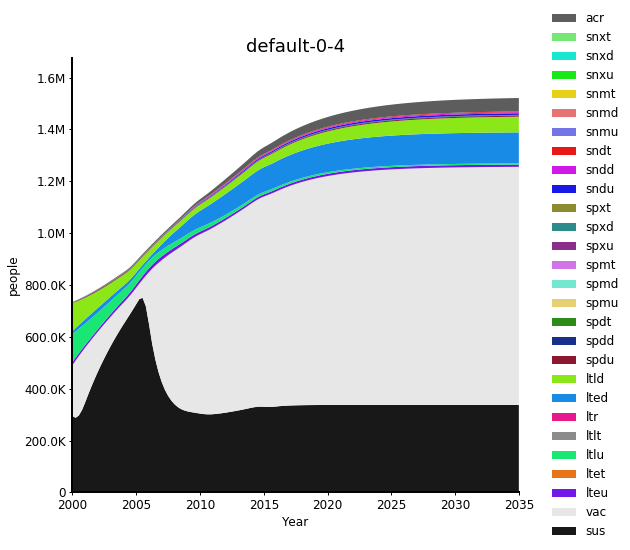

In [10]:
d = PlotData(par_results,pops='0-4')
plotSeries(d,plot_type='stacked');

Next, we will perform a run using programs. To use programs, the cascade workbook must describe program types, and the databook must have data entered for the programs. There are two parts to programs. First, we have a `ProgramSet` object that stores the program data from the databook:

In [11]:
progset = proj.makeProgset(name='default-progset')

29-03-18 06:11:35    INFO     Created ProgramSet: default-progset


Then, we have an `options` dictionary that contains settings specific to _running_ the programs, like what year to switch from the parset to the progset, or the amount of spending on each program.

In [12]:
options = defaultOptimOptions(settings=proj.settings, progset = proj.progsets[0])
options.keys()

['orig_alloc',
 'objectives',
 'progs_end',
 'progs_start',
 'saturate_with_default_budgets',
 'init_alloc',
 'constraints']

We can now run a simulation with programs, by passing in the parset, the progset, and the options:

In [14]:
prog_results = proj.runSim(parset_name='default', progset_name='default-progset', options=options, plot=False)
d = PlotData(prog_results,pops='0-4')
plotSeries(d,plot_type='stacked');

Exception: odict key "tvec_dt" not found; available keys are:
impact_pars_not_func
progs_start
progs_end
init_alloc
constraints
alloc_is_coverage
saturate_with_default_budgets